In [ ]:
#file:///C:/Users/sk565d/Downloads/MVTPL%20Kurnool%20Wind%20Farm.pdf
''' 
Input Section 
Turbine: Suzlon 2.1, MW-S-111, GE-1.7 MW-103, and GE-2.3MW-11
Type: DFIG Horizontal Axis Wind Turbine with variable Rotor Speed
Rated power: 1700 KW 
Rotation speed: 10-17.14 rpm 

No. of towers: 97 
Air density: 1.225 kg/m2 
Annual average wind speed: 7.5 m/s 
wind shear: 0.2 
sut-in wind speed: 3 m/s 
cut-out wind speed: 20 m/s 
Rated wind speed: 9.4 m/s 
survival wind speed: 52.5 m/s

Rotor:
Rotor diameter: 103 m 
Rotor length: 50.2 m 
No. of Blades: 3 
Swept Area: 8332 m2 
Orientation: Upwind 
Direction of rotation: Clockwise 

Generator: 
Rated Power: 1745 KW 
no. of poles: 4, 3-phase 
Rated voltage: 690 V 
Frequency: 50 Hz 

Tower height:
Height: 79.7 m 

30 x 1.7 MW (GE-1.7), 44 x 2.3 MW (GE-2.3), 23 x 2.1 MW (S-111 Salon) Wind Turbine Generators (WTG)
'''

In [ ]:
(30 * 1.7) + (44 * 2.3) + (23 * 2.1) 

200.5

In [ ]:
AD = 1.225 
WS = 7.5
Area = 3.14*50**2
0.5*AD*WS**3*Area*0.4  

811371.09375

In [ ]:
(1700000/(0.5*AD*Area*0.4))**(1/3) 

9.597049321607928

In [ ]:
3.14*50.2**2

7912.925600000001

In [ ]:
0.5*1.225*3.14*50**2*12**3*0.4

3323376.0

In [ ]:
# To extract weather report on any given location
import pandas as pd
from datetime import date
from lxml import html 
import requests   

datelist = pd.date_range(date.today(), periods=8).tolist()
dates = []

for i in range(len(datelist)):
  dates.append(str(datelist[i])[:10]) 
final_days = []

for i in range(len(dates)):
  days = ''
  for j in dates[i]:
    if j != '-':
      days = days + j
  final_days.append(days)

country = "India" # Enter the country name
city = "kurnool" # Enter the city name 
url = f"https://www.timeanddate.com/weather/{country}/{city}/hourly?hd="
links = []

for i in range(len(final_days)):
  links.append(url+final_days[i]) 

total_df = pd.DataFrame({'Date': pd.Series(dtype='string'), 'Time': pd.Series(dtype='string'),'Temperature': pd.Series(dtype='string'), 'Weather': pd.Series(dtype='string'),
                          'Wind': pd.Series(dtype='string'),  'Humidity': pd.Series(dtype='string'), 'Precipitation': pd.Series(dtype='string')}) 
for i in range(len(links)):
  my_url = links[i]
  resp = requests.get(my_url)
  tree = html.fromstring(resp.content) 
  cur_time = tree.xpath('//*[@id="wt-hbh"]/tbody/tr[*]/th/text()')
  temperature = tree.xpath('//*[@id="wt-hbh"]/tbody/tr[*]/td[2]//text()')
  weather = tree.xpath('//*[@id="wt-hbh"]/tbody/tr[*]/td[3]//text()')
  wind = tree.xpath('//*[@id="wt-hbh"]/tbody/tr[*]/td[5]//text()')
  humidity = tree.xpath('//*[@id="wt-hbh"]/tbody/tr[*]/td[7]//text()')
  precipitation = tree.xpath('//*[@id="wt-hbh"]/tbody/tr[*]/td[8]//text()')
  weather_df = pd.DataFrame({'Time': cur_time, 'Temperature': temperature, 'Weather': weather,  'Wind': wind, 'Humidity': humidity, 'Precipitation': precipitation}) 
  weather_df["Date"] = dates[i] 
  temp_cols = weather_df.columns.tolist()
  new_cols = temp_cols[-1:] + temp_cols[:-1]
  weather_df = weather_df[new_cols] 
  if i == 0:
    total_df = weather_df 
  else:
    total_df = total_df.append(weather_df, ignore_index = True)  
  reqhour = []
for i in range(len(total_df)):
  if total_df.iloc[i,1][-2:] =='am': 
    tim = total_df.iloc[i,1][0:2]  
    if tim[-1] == ':': 
      tim = str('0'+tim[0])
    reqhour.append(tim) 
  if total_df.iloc[i,1][-2:] =='pm':
    tim = total_df.iloc[i,1][0:2]
    if tim[-1] == ':': 
      tim = str('0'+tim[0])
    reqhour.append(tim) 
total_df.insert(7,"hours",reqhour) 
total_df

,Date,Time,Temperature,Weather,Wind,Humidity,Precipitation,hours
0,2023-02-19,9:00 pm,80 °F,Clear.,7 mph,48%,0%,09
1,2023-02-19,10:00 pm,78 °F,Clear.,7 mph,52%,0%,10
2,2023-02-19,11:00 pm,76 °F,Clear.,7 mph,57%,0%,11
3,2023-02-19,12:00 am,74 °F,Clear.,7 mph,60%,0%,12
4,2023-02-19,1:00 am,74 °F,Clear.,6 mph,61%,0%,01
...,...,...,...,...,...,...,...,...
187,2023-02-26,4:00 pm,95 °F,Sunny.,6 mph,26%,0%,04
188,2023-02-26,5:00 pm,93 °F,Sunny.,5 mph,27%,0%,05
189,2023-02-26,6:00 pm,90 °F,Sunny.,5 mph,31%,0%,06
190,2023-02-26,7:00 pm,86 °F,Clear.,5 mph,36%,0%,07


In [ ]:
import numpy as np 
wind = [int(s[:2]) for s in list(total_df.iloc[:,4])] 
lst1 = [int(s[:2]) for s in list(total_df.iloc[:,2])] 
lst2 = [int(s[-2:]) for s in list(total_df.iloc[:,0])] 
lst3 = [int(s[5:7]) for s in list(total_df.iloc[:,0])] 
celcius = (np.array(lst1) - 32.0) * 5/9
celcius = [round(s,1) for s in celcius]
hours = list(total_df.iloc[:,7]) 
future_df = pd.DataFrame({"Month":lst3, "Day":lst2, "Hour" : hours, "Temperature": celcius, "Wind Speed": wind}) 
future_df['Hour'] = pd.to_numeric(future_df["Hour"], downcast="float") 
future_df['Day'] = pd.to_numeric(future_df["Day"], downcast="float") 
future_df['Month'] = pd.to_numeric(future_df["Month"], downcast="float") 
future_df 

,Month,Day,Hour,Temperature,Wind Speed
0,2.0,19.0,9.0,26.7,7
1,2.0,19.0,10.0,25.6,7
2,2.0,19.0,11.0,24.4,7
3,2.0,19.0,12.0,23.3,7
4,2.0,19.0,1.0,23.3,6
...,...,...,...,...,...
187,2.0,26.0,4.0,35.0,6
188,2.0,26.0,5.0,33.9,5
189,2.0,26.0,6.0,32.2,5
190,2.0,26.0,7.0,30.0,5


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#%matplotlib inline 

# Convert the date and time columns to a pandas datetime object
data = pd.read_csv('/content/Wind Dataset.csv')
data1 = data 
data  

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


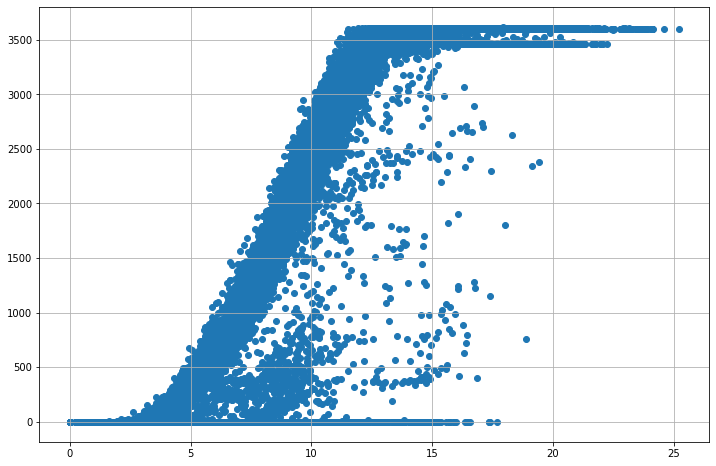

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(data["Wind Speed (m/s)"], data["LV ActivePower (kW)"])
plt.grid()
plt.show()

In [ ]:
dates = [i[:10] for i in data.iloc[:,0]]
times = [i[11:] for i in data.iloc[:,0]]  
data1.insert(0, "Date", dates)
data1.insert(1,"Time", times) 
data1 = data1.drop("Date/Time", axis = 1) 
data1   

,Date,Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018,00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018,00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018,00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018,00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018,00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...,...
50525,31 12 2018,23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018,23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018,23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018,23:40,2515.694092,9.421366,2418.382503,84.297913


In [ ]:
uniquedates = data1.Date.unique()
uniquetimes = ['00:00', '01:00', '02:00',  '03:00',  '04:00',  '05:00',  '06:00', '07:00', '08:00', '09:00',  '10:00', '11:00', '12:00', '13:00', '14:00', '15:00','16:00', '17:00', '18:00',  '19:00','20:00', '21:00', '22:00','23:00']
uniquetimes 

['00:00',
 '01:00',
 '02:00',
 '03:00',
 '04:00',
 '05:00',
 '06:00',
 '07:00',
 '08:00',
 '09:00',
 '10:00',
 '11:00',
 '12:00',
 '13:00',
 '14:00',
 '15:00',
 '16:00',
 '17:00',
 '18:00',
 '19:00',
 '20:00',
 '21:00',
 '22:00',
 '23:00']

In [ ]:
final_df = pd.DataFrame({"Date": pd.Series(dtype="string"), "Time": pd.Series(dtype="string"), "Power": pd.Series(dtype="float"), "Wind Speed": pd.Series(dtype="float"), "Theoritical Power": pd.Series(dtype="float"), "Wind Direction": pd.Series(dtype="float") }) 

for days in range(len(uniquedates)): 
  high_df = data1[data1["Date"] == uniquedates[days]] 
  indexes = []
  for i in range(len(uniquetimes)):
    tindex = high_df[high_df["Time"] == uniquetimes[i]].index
    if len(tindex) > 0:
      indexes.append(tindex[0])
  indexes = [s-indexes[0] for s in indexes] 
  for hour in range(len(indexes)-1):
    temp_df = high_df[indexes[hour]:indexes[hour]+1] 
    avglst = [uniquedates[days], list(temp_df["Time"])[-1], temp_df["LV ActivePower (kW)"].mean(), temp_df["Wind Speed (m/s)"].mean(), temp_df["Theoretical_Power_Curve (KWh)"].mean(), temp_df["Wind Direction (°)"].mean() ]
    final_df.loc[len(final_df)] = avglst  

final_df 

,Date,Time,Power,Wind Speed,Theoritical Power,Wind Direction
0,01 01 2018,00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018,01:00,447.605713,5.793008,557.372363,266.163605
2,01 01 2018,02:00,710.587280,6.547414,824.662514,274.232910
3,01 01 2018,03:00,736.647827,6.415083,773.172863,261.158691
4,01 01 2018,04:00,1493.807983,7.943102,1497.583724,256.407410
...,...,...,...,...,...,...
8061,31 12 2018,18:00,323.725311,4.502378,222.503209,92.350723
8062,31 12 2018,19:00,529.938904,5.197528,386.049437,97.632187
8063,31 12 2018,20:00,1731.552979,8.674524,1936.655737,78.169724
8064,31 12 2018,21:00,2309.875000,9.714014,2601.071371,80.272682


In [ ]:
final_df.iloc[:,0] = [s.replace('2018','2022') for s in final_df.iloc[:,0]]
day = [s[:2] for s in final_df.iloc[:,0]]
month = [s[3:5] for s in final_df.iloc[:,0]]
hour = [s[:2] for s in final_df.iloc[:,1]]
final_df.insert(2, "Month", month)
final_df.insert(3, "Day", day)
final_df.insert(4, "Hour", hour)
final_df 

,Date,Time,Month,Day,Hour,Power,Wind Speed,Theoritical Power,Wind Direction
0,01 01 2022,00:00,01,01,00,380.047791,5.311336,416.328908,259.994904
1,01 01 2022,01:00,01,01,01,447.605713,5.793008,557.372363,266.163605
2,01 01 2022,02:00,01,01,02,710.587280,6.547414,824.662514,274.232910
3,01 01 2022,03:00,01,01,03,736.647827,6.415083,773.172863,261.158691
4,01 01 2022,04:00,01,01,04,1493.807983,7.943102,1497.583724,256.407410
...,...,...,...,...,...,...,...,...,...
8061,31 12 2022,18:00,12,31,18,323.725311,4.502378,222.503209,92.350723
8062,31 12 2022,19:00,12,31,19,529.938904,5.197528,386.049437,97.632187
8063,31 12 2022,20:00,12,31,20,1731.552979,8.674524,1936.655737,78.169724
8064,31 12 2022,21:00,12,31,21,2309.875000,9.714014,2601.071371,80.272682


In [ ]:
final_df[(final_df.iloc[:,5] == final_df.iloc[:,5].max()) | (final_df.iloc[:,6] == final_df.iloc[:,6].max())] 

,Date,Time,Month,Day,Hour,Power,Wind Speed,Theoritical Power,Wind Direction
635,02 02 2022,04:00,02,02,04,3601.082031,24.088051,3600.0,184.098801
2382,19 04 2022,05:00,04,19,05,3604.870117,14.344190,3600.0,52.281639


In [ ]:
final_df.iloc[:,6].min()

24.0880508422851

In [ ]:
df = final_df.fillna(method='ffill')
X = final_df.iloc[:,2:5].to_numpy()
#X = X.reshape(-1,1)
y = final_df.iloc[:,6].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestRegressor

rf1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf1.fit(X_train, y_train); 

predictions = rf1.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracyRandForest = 100 - np.mean(mape)
print('Accuracy:', round(accuracyRandForest, 2), '%.')
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.') 
predictions = rf1.predict(final_df.iloc[:,2:5].values) 
predictions 
mod_df = final_df.iloc[:,[0,6]]
mod_df.insert(2,"PredWindSpeed", predictions) 
mod_df   

Accuracy: 75.78 %.
Mean Absolute Error: 1.07 degrees.


,Date,Wind Speed,PredWindSpeed
0,01 01 2022,5.311336,5.620272
1,01 01 2022,5.793008,5.808478
2,01 01 2022,6.547414,6.344380
3,01 01 2022,6.415083,6.568930
4,01 01 2022,7.943102,7.458136
...,...,...,...
8061,31 12 2022,4.502378,4.752570
8062,31 12 2022,5.197528,5.106099
8063,31 12 2022,8.674524,5.782443
8064,31 12 2022,9.714014,8.597675


In [ ]:
mod_df = mod_df[mod_df["Wind Speed"] != 0] 
mod_df = mod_df[mod_df["PredWindSpeed"] != 0] 
eacherror = list((abs(mod_df.iloc[:,1] - mod_df.iloc[:,2])/mod_df.iloc[:,1])*100)
100 - (sum(eacherror)/len(eacherror))

87.77479633608449

In [ ]:
df = final_df.fillna(method='ffill')
X = final_df.iloc[:,[2,3,4,6]].to_numpy()
#X = X.reshape(-1,1)
y = final_df.iloc[:,5].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf2.fit(X_train, y_train); 

predictions = rf2.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracyRandForest = 100 - np.mean(mape)
print('Accuracy:', round(accuracyRandForest, 2), '%.')
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.') 
predictions = rf2.predict(final_df.iloc[:,[2,3,4,6]].values) 
predictions 
mod_df = final_df.iloc[:,[2,3,4,6,5]]
mod_df.insert(5,"PredPower", predictions) 
mod_df   

<ipython-input-14-b88720fa842b>:14: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / y_test)
<ipython-input-14-b88720fa842b>:14: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * (errors / y_test)


Accuracy: nan %.
Mean Absolute Error: 114.14 degrees.


,Month,Day,Hour,Wind Speed,Power,PredPower
0,01,01,00,5.311336,380.047791,373.724113
1,01,01,01,5.793008,447.605713,483.697506
2,01,01,02,6.547414,710.587280,725.757002
3,01,01,03,6.415083,736.647827,610.971347
4,01,01,04,7.943102,1493.807983,1494.431681
...,...,...,...,...,...,...
8061,12,31,18,4.502378,323.725311,236.455887
8062,12,31,19,5.197528,529.938904,438.184784
8063,12,31,20,8.674524,1731.552979,1369.684706
8064,12,31,21,9.714014,2309.875000,1673.070412


In [2]:
mod_df = mod_df[mod_df["Power"] != 0] 
mod_df = mod_df[mod_df["PredPower"] != 0] 
eacherror = list((abs(mod_df.iloc[:,-1] - mod_df.iloc[:,-2])/mod_df.iloc[:,-1])*100)
100 - (sum(eacherror)/len(eacherror))

96.77


In [ ]:
mod_df[(mod_df["Day"]=="01") & (mod_df["Month"] == "01")] 

,Month,Day,Hour,Wind Speed,Power,PredPower
0,01,01,00,5.311336,380.047791,373.724113
1,01,01,01,5.793008,447.605713,483.697506
2,01,01,02,6.547414,710.587280,725.757002
3,01,01,03,6.415083,736.647827,610.971347
4,01,01,04,7.943102,1493.807983,1494.431681
5,01,01,05,7.098298,1164.892944,1023.081655
6,01,01,06,7.239252,1114.026978,1113.689126
7,01,01,07,6.887821,909.887817,883.742255
8,01,01,08,5.816826,585.259399,526.795307
9,01,01,09,6.194369,725.868103,680.452818


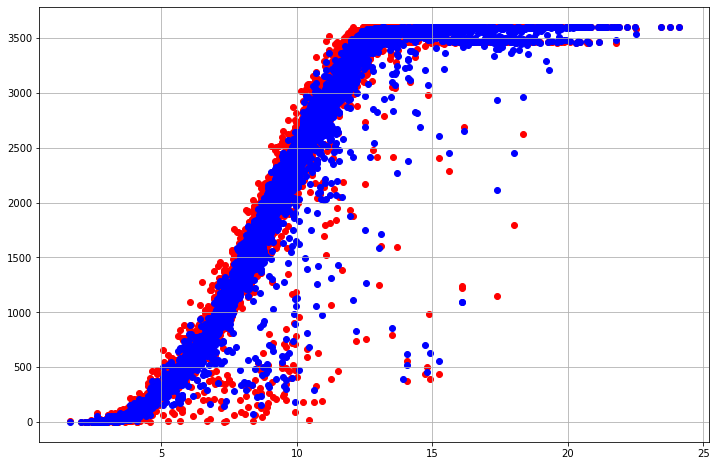

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(mod_df["Wind Speed"], mod_df["Power"], c="red")
plt.scatter(mod_df["Wind Speed"], mod_df["PredPower"], c="blue")
plt.grid()
plt.show()